##  Project Info:
In this project... <br>
**Questions to be answered:** <br>
1) [What is the distribution of countries based on electricity generated by renewables in 2021?](#section1)
2) [Which 5 countries in the EU, have the biggest production of electricity from renewables in 2021?](#section2)
3) [What is the correlation of Fossil and Renewables electricity for each country?](#section3)
4) [For each country, what percentage of demand can be  covered by Renewables or Fossil electricity?](#section4)
5) [Which of the countries depend on importing electricity?](#section5)
6) [Which is the main source of renewable electricity production  for each country?](#section6)

**Variables used:** <br>

1) **renewables_electricity :** Electricity generation from renewables, measured in terawatt-hours
2) **fossil_electricity** : This is the sum of electricity generation from coal, oil and gas , measured in terawatt-hours.
3) **electricity_demand** : Electricity demand, measured in terawatt-hours
4) **electricity_generation** : Electricity generation, measured in terawatt-hours
5) **net_elec_imports** : 	Net electricity imports, measured in terawatt-hours
6) **hydro_electricity** : Electricity generation from hydropower, measured in terawatt-hours
7) **solar_electricity** : Electricity generation from solar, measured in terawatt-hours
8) **wind_electricity** : Electricity generation from wind, measured in terawatt-hours
9) **greenhouse_gas_emissions** : Greenhouse-gas emissions produced in the generation of electricity, measured in million tonnes of CO2 equivalent

- Source: __[here](https://github.com/owid/energy-data/blob/master/owid-energy-codebook.csv)__


---

#### Read csv and explore data:
<a id='section0'></a>

In [1]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import folium
plt.style.use('ggplot')

In [2]:
df=pd.read_csv('energy-data.csv')

In [3]:
df.head(2)

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_consumption,solar_elec_per_capita,solar_energy_per_capita,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,AFG,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1901,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(17239, 128)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17239 entries, 0 to 17238
Columns: 128 entries, iso_code to wind_energy_per_capita
dtypes: float64(125), int64(1), object(2)
memory usage: 16.8+ MB


In [6]:
df.describe()

,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,biofuel_share_elec,...,solar_consumption,solar_elec_per_capita,solar_energy_per_capita,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
count,17239.000000,7152.000000,13589.000000,5.074000e+03,9491.000000,6474.000000,10106.000000,9983.000000,10135.000000,4936.000000,...,4835.000000,7112.000000,4367.000000,6067.000000,1820.000000,4835.000000,4743.000000,4835.000000,7112.000000,4367.000000
mean,1973.609722,23.968662,9.621462,1.841334e+14,14.152412,20.067887,15.282424,4.224858,42.962626,2.094248,...,7.969383,13.952362,36.392106,1.223524,209.910982,0.371352,3.257272,23.392614,53.206260,149.732919
std,34.727666,725.148859,149.031801,1.311620e+16,92.682368,354.470689,176.113214,26.573195,316.803222,5.604580,...,72.336142,60.524479,150.525206,4.396865,5707.382457,1.421771,21.193715,165.083532,239.279519,559.841069
min,1900.000000,-100.000000,-2366.470000,-1.000000e+02,-1225.490000,-100.000000,-3638.516000,-95.005000,-6910.324000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-100.000000,0.000000,-10.409000,0.000000,0.000000,0.000000
25%,1946.000000,-5.226250,0.000000,-1.382250e+00,0.000000,-3.816750,0.000000,-0.670000,-0.065000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.481000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1983.000000,2.030000,0.000000,3.718500e+00,0.000000,1.300000,0.000000,2.341000,0.445000,0.019000,...,0.000000,0.000000,0.000000,0.000000,19.732000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2002.000000,9.994500,0.163000,1.152850e+01,1.333000,10.692750,1.384000,6.713000,8.435000,1.595500,...,0.017000,0.000000,0.432000,0.108500,50.064000,0.022000,0.019000,0.191500,0.555000,5.816500
max,2021.000000,44965.754000,3057.952000,9.342930e+17,2093.606000,25500.000000,2795.152000,1458.505000,6502.243000,72.881000,...,2111.177000,1129.198000,2306.786000,56.840000,242329.182000,24.601000,430.975000,3925.718000,3588.088000,6965.521000


---
#### Select prefered data
<a id='section0'></a>

In [7]:
df.set_index('country', inplace=True)
eu=['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark','Estonia', 'Finland',
'France', 'Germany', 'Greece', 'Hungary', 'Ireland','Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 
 'Netherlands','Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'European Union (27)']

In [8]:
df_eu=df.loc[eu,['year','renewables_electricity','fossil_electricity','electricity_demand','electricity_generation','net_elec_imports','hydro_electricity', 'solar_electricity', 'wind_electricity']].reset_index().set_index('year')

In [9]:
import numpy as np
for col in df_eu.columns:
    pct_missing = round(np.mean(df_eu[col].isnull())*100,1)
    print('{} - {}% '.format(col,pct_missing))

country - 0.0% 
renewables_electricity - 41.8% 
fossil_electricity - 63.3% 
electricity_demand - 64.3% 
electricity_generation - 59.3% 
net_elec_imports - 64.3% 
hydro_electricity - 41.8% 
solar_electricity - 41.8% 
wind_electricity - 41.8% 


---
#### What is the distribution of countries based on electricity generated by renewables in 2021?
<a id='section1'></a>

In [10]:
eu2021=df.loc[eu,['iso_code','year','renewables_electricity']].reset_index().set_index('year').loc[2021]

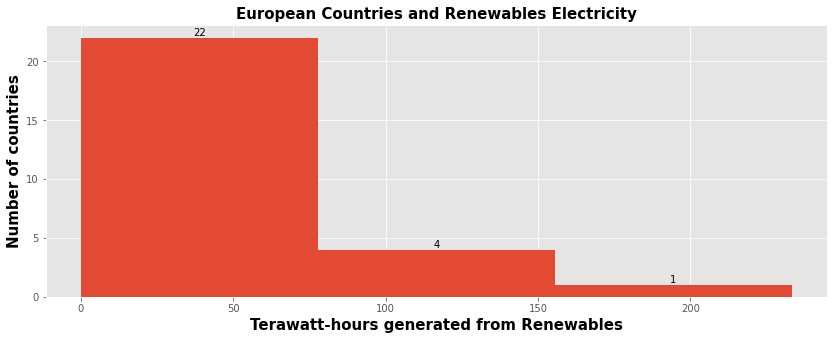

In [11]:
plt.figure(figsize=(14,5))
counts, edges, bars =plt.hist(eu2021['renewables_electricity'][eu2021['country']!='European Union (27)'],bins=3)
plt.bar_label(bars)

plt.title('European Countries and Renewables Electricity',fontsize=15, fontweight='bold',c='black')
plt.xlabel('Terawatt-hours generated from Renewables',fontsize=15,fontweight='bold',c='black')
plt.ylabel('Number of countries',fontsize=15,fontweight='bold',c='black')
plt.show()

---
#### Which 5 countries in the EU, have the biggest production of electricity from renewables in 2021?
<a id='section2'></a>

In [12]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
euGeom=world[world['name'].isin(eu)][['name','geometry']]
df_eu_geom=euGeom.set_index('name').join(eu2021.set_index('country'))

In [13]:
m = folium.Map(location=[50, 0], zoom_start=3)

folium.Choropleth(
    geo_data=df_eu_geom,
    data=df_eu_geom['renewables_electricity'],
    columns = ['renewables_electricity','iso_code'],
    bins = 3,
    key_on="feature.id",
    fill_color='YlOrRd',
    fill_opacity=1,
    legend_name='Electricity generation from renewables, measured in terawatt-hours' ,
    highlight=True,
).add_to(m)

folium.features.GeoJson(
     df_eu_geom,
     style_function=lambda x: {'color':'black','fillColor':'transparent','weight':0.2},
     control=False,
     highlight_function=lambda x: {'weight':2.5,'fillColor':'transparent'},
     tooltip=folium.features.GeoJsonTooltip(
          fields=['renewables_electricity','iso_code'],
          aliases=['Production :','Iso :'],
          style="""
               background-color: #F0EFEF;
               border: 1.7px solid black;
               border-radius: 2px;
               box-shadow: 2px;
          """,
          sticky=True,
          localize=True,
          labels=True
     )
).add_to(m)

m

Looking at the above choropleth map the conclusion is:
1. **Germany** 
1. **Spain**
1. **France** 
1. **Italy**
1. **Sweden**
<br>
<br>
Are the top 5 countries to provide renewable energy in the European Union, for the year 2021.
>From now on the rest of the project will be focused on these countries.

In [14]:
top5=['Germany','Spain','France','Italy','Sweden','European Union (27)']

---
#### What is the correlation of Fossil and Renewables electricity for each country?
<a id='section3'></a>

In [15]:
correlations=[]
for i in top5:
    temp_country=df_eu[df_eu['country']==i].loc[1990:]
    correlations.append(temp_country.corr().loc['renewables_electricity','fossil_electricity'])

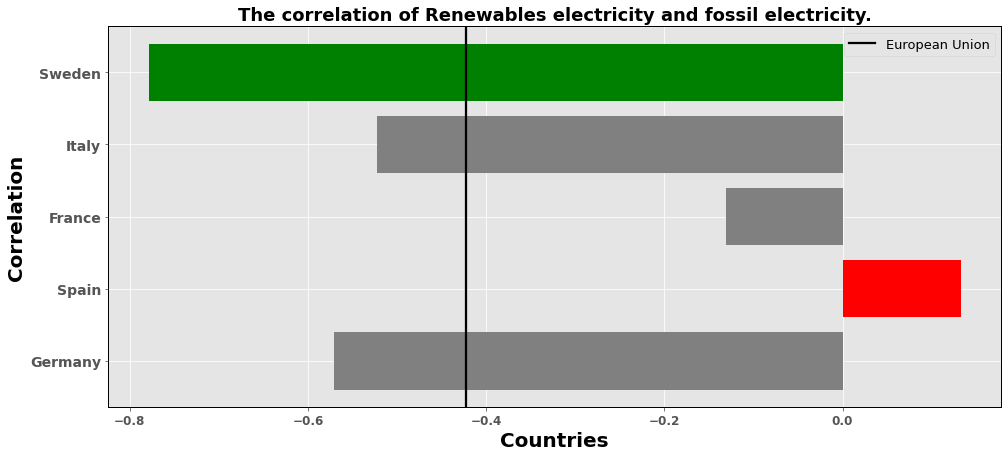

In [16]:
plt.figure(figsize=(16,7))
plt.rc('axes',edgecolor='k')
plt.yticks(fontsize=14,fontweight="bold")
plt.xticks(fontsize=12,fontweight="bold")
clrs = ['red' if (x == max(correlations)) else 'green' if x==min(correlations) else 'grey'  for x in correlations ]
plt.barh(top5[:-1],correlations[:-1],color=clrs)
plt.axvline(correlations[-1],c='black',label="European Union",linewidth=2.25)
plt.title('The correlation of Renewables electricity and fossil electricity.',fontsize=18, fontweight='bold',c='black')
plt.xlabel('Countries',fontsize=20,fontweight='bold',c='black')
plt.ylabel('Correlation',fontsize=20,fontweight='bold',c='black')
plt.legend(fontsize=13)
plt.show()

The deduction is that for Sweden, Italy, France and Germany the Renewables electricity is a **substitute** to Fossil electricity. On the other hand, for Spain the first is **complementary** to the second. <br>Finally it is shown that for the European Union as a hole, Renewable Electricity is also a substitute which is great news for the cliamte change.

---
#### For each country, what percentage of demand can be  covered by Renewables or Fossil electricity?
<a id='section4'></a>

In [17]:
df_eu['perc_of_demand_r']=df_eu['renewables_electricity']/df_eu['electricity_demand']
df_eu['perc_of_demand_f']=df_eu['fossil_electricity']/df_eu['electricity_demand']

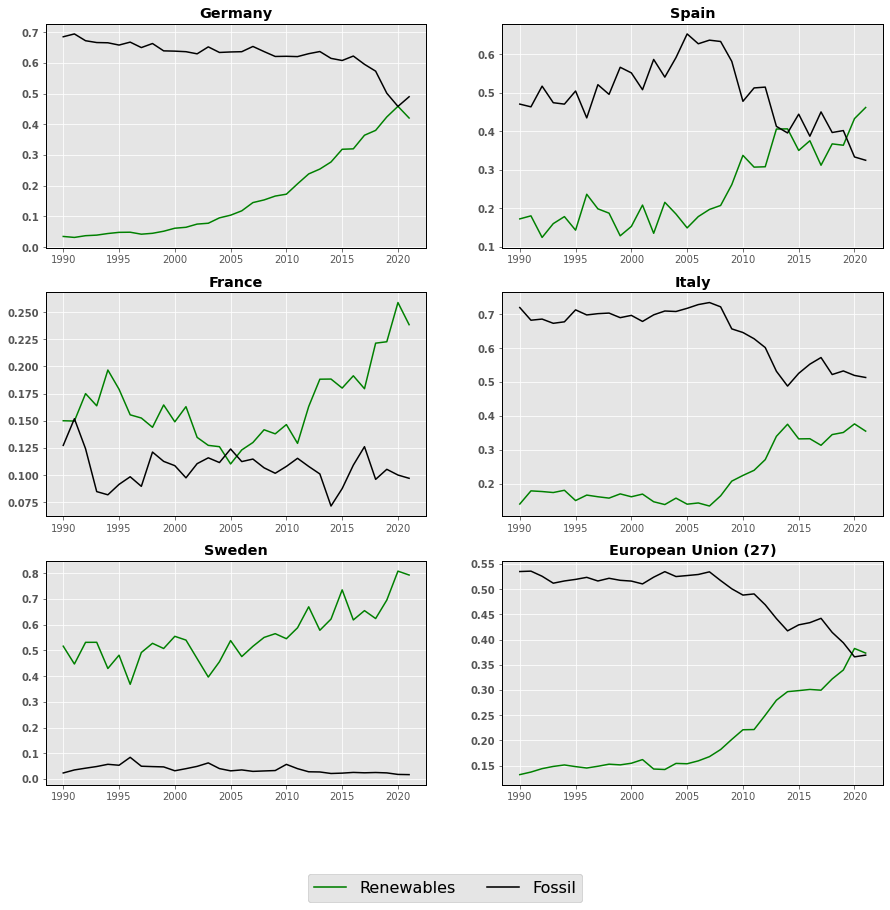

In [18]:
plt.figure(figsize=(15, 14))
for i in range(len(top5)):
    ax = plt.subplot(3, 2, i+1)
    plt.yticks(fontweight="bold")
    # if i=='European Union (27)':
    #     continue
    ax.plot(df_eu[df_eu['country']==top5[i]]['perc_of_demand_r'],label='Renewables',c='green')
    ax.plot(df_eu[df_eu['country']==top5[i]]['perc_of_demand_f'],label='Fossil',c='black')
    ax.set_title(top5[i],fontweight="bold")
    handles, labels = ax.get_legend_handles_labels()
    plt.figlegend( handles, labels, loc = 'lower center', ncol=2, labelspacing=0.1, prop={'size': 16})

Throughout the years only France and Sweden seems to have managed to cover bigger percentage of their electricity demand with renewable elecricity. Additionally very important is the fact that **Sweden covers 80%** of their electricity demand with Renewable energy. Also in 2020s, European Union as a hole, seems to cover the same percentage of demand with both electricity sources, for the first time.

---
#### Which of the countries depend on importing electricity?
<a id='section5'></a>

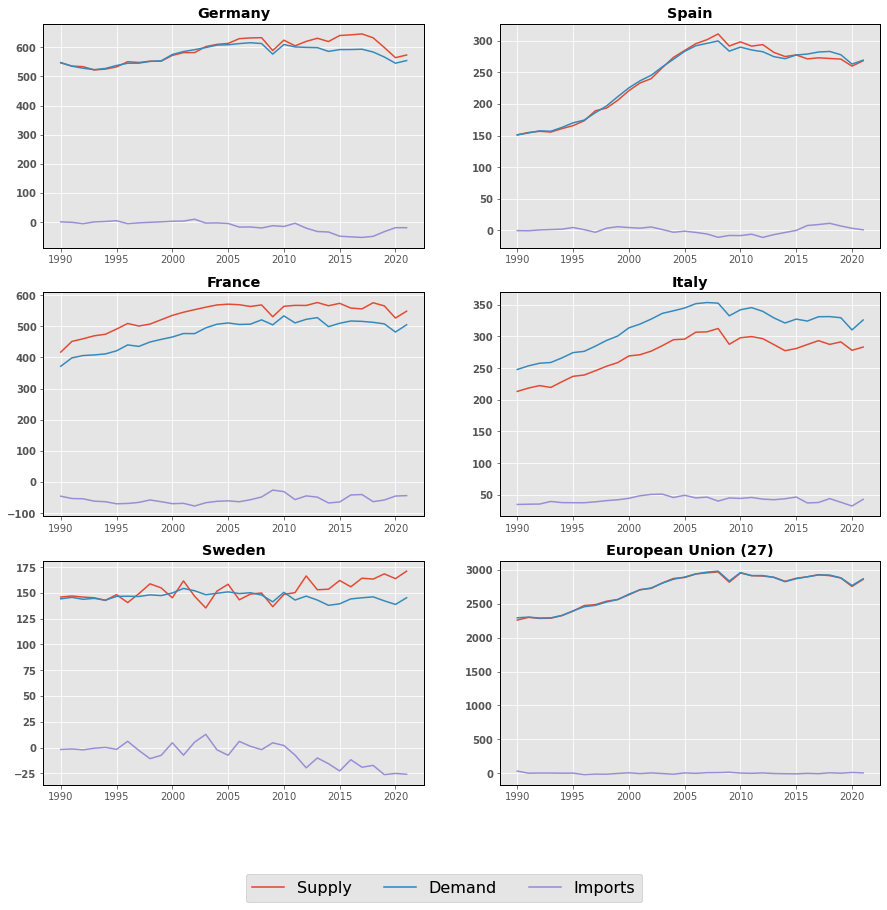

In [19]:
plt.figure(figsize=(15, 14))
for i in range(len(top5)):
    ax = plt.subplot(3, 2, i+1)
    plt.yticks(fontweight="bold")
    ax.plot(df_eu[df_eu['country']==top5[i]]['electricity_generation'].loc[1990:],label='Supply' )
    ax.plot(df_eu[df_eu['country']==top5[i]]['electricity_demand'].loc[1990:],label='Demand' )
    ax.plot(df_eu[df_eu['country']==top5[i]]['net_elec_imports'].loc[1990:],label='Imports' )
    ax.set_title(top5[i],fontweight="bold")
    handles, labels = ax.get_legend_handles_labels()
    plt.figlegend( handles, labels, loc = 'lower center', ncol=3, labelspacing=0.1, prop={'size': 16})


Firstly, from the above diagramms  we conclude that the countries who export electricity are Germany, France and Sweden. Also it seems like Italy has a big shortage of electricity, because demand isn't covered by the supply, so they import energy from other countries.

---
#### Which is the main source of renewable electricity production  for each country?
<a id='section6'></a>

In [20]:
df_eu['share_hydro']=df_eu['hydro_electricity']/df_eu['renewables_electricity']
df_eu['share_solar']=df_eu['solar_electricity']/df_eu['renewables_electricity']
df_eu['share_wind']=df_eu['wind_electricity']/df_eu['renewables_electricity']

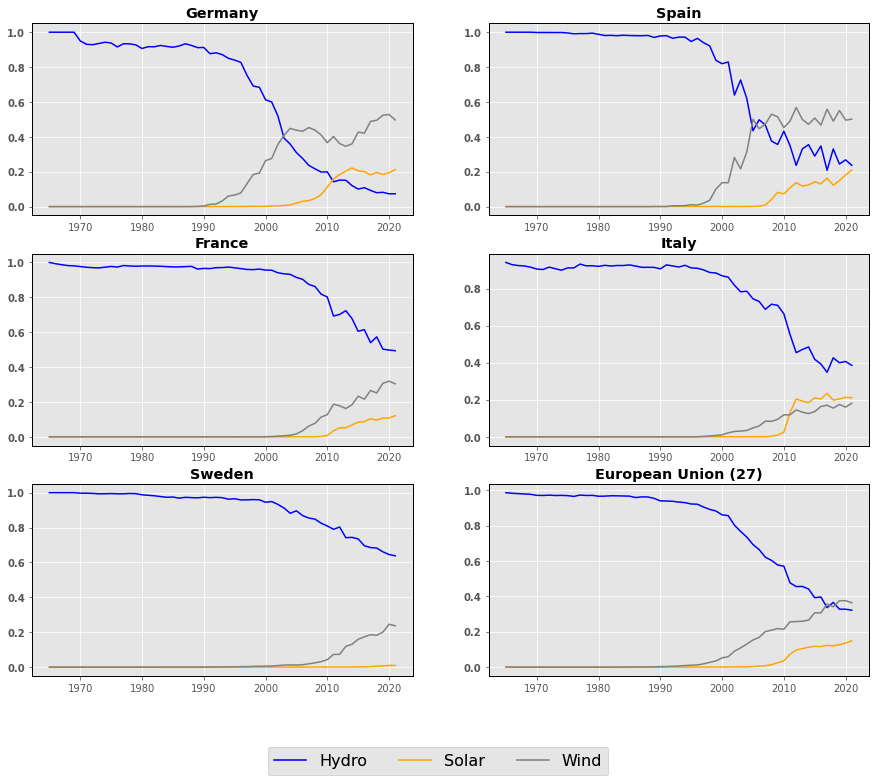

In [21]:
plt.figure(figsize=(15, 12))
for i in range(len(top5)):
    
    ax = plt.subplot(3, 2, i+1)
    plt.yticks(fontweight="bold")
    ax.plot(df_eu[df_eu['country']==top5[i]]['share_hydro'],label='Hydro', color='blue' )
    ax.plot(df_eu[df_eu['country']==top5[i]]['share_solar'],label='Solar', color='orange' )
    ax.plot(df_eu[df_eu['country']==top5[i]]['share_wind'],label='Wind',color='grey' )
    ax.set_title(top5[i],fontweight="bold")
    handles, labels = ax.get_legend_handles_labels()
    plt.figlegend( handles, labels, loc = 'lower center', ncol=3, labelspacing=0.1, prop={'size': 16})


With the passing of time, new inventions were created that revolutionized the production of solar and wind electricity. With that in mind one conclusion is that for Germany and Spain the leading source for generating renewable electicity is the wind. Also France, Italy and Sweden still rely the most to hydro electricity. Lastly it is concluded that for the European Union as a hole, the production of wind electricity has increased and has taken the lead.